# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [26]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [17]:

fitbit = pd.read_csv("../data/Fitbit2.csv")

In [18]:
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5


In [19]:
# NOTA; Renombro columnas eliminando mayúsculas y espacios.
fitbit_copy = fitbit.copy()

In [20]:
columnas = list(fitbit_copy.keys())

In [21]:
diccio_nuevas = {columna: columna.replace(" ", "_").lower() for columna in columnas}

In [22]:
fitbit_renombrado = fitbit.rename(columns=diccio_nuevas)

In [23]:
fitbit_renombrado.sample()

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,...,distance_miles,days,days_encoded,work_or_weekend,hours_sleep,sleep_efficiency,yesterday_sleep,yesterday_sleep_efficiency,months,months_encoded
158,2015-10-13,2698,7015,5.21,10,1.244,130,37,29,1036,...,3.237343,Tuesday,1.0,1,0.0,0.0,6.45,95.792079,October,10


In [24]:
fitbit.rename(columns=diccio_nuevas, inplace=True)

In [29]:
# Hago un análisis de los datos para asegurarme de que no haya problemas con null numbers o NaN.
pd.isnull(fitbit).sum()

date                          0
calorie_burned                0
steps                         0
distance                      0
floors                        0
minutes_sedentary             0
minutes_lightly_active        0
minutes_fairly_active         0
minutes_very_active           0
activity_calories             0
minutesofsleep                0
minutesofbeingawake           0
numberofawakings              0
lengthofrestinminutes         0
distance_miles                0
days                          0
days_encoded                  0
work_or_weekend               0
hours_sleep                   0
sleep_efficiency              0
yesterday_sleep               0
yesterday_sleep_efficiency    0
months                        0
months_encoded                0
dtype: int64

In [30]:
pd.isna(fitbit).sum()

date                          0
calorie_burned                0
steps                         0
distance                      0
floors                        0
minutes_sedentary             0
minutes_lightly_active        0
minutes_fairly_active         0
minutes_very_active           0
activity_calories             0
minutesofsleep                0
minutesofbeingawake           0
numberofawakings              0
lengthofrestinminutes         0
distance_miles                0
days                          0
days_encoded                  0
work_or_weekend               0
hours_sleep                   0
sleep_efficiency              0
yesterday_sleep               0
yesterday_sleep_efficiency    0
months                        0
months_encoded                0
dtype: int64

In [33]:
fitbit.shape

(367, 24)

In [35]:
fitbit.sample(3)

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,...,distance_miles,days,days_encoded,work_or_weekend,hours_sleep,sleep_efficiency,yesterday_sleep,yesterday_sleep_efficiency,months,months_encoded
278,2016-02-09,2872,10457,7.82,14,847.0,181,15,41,1252,...,4.859121,Tuesday,1.0,1,5.700000,89.295039,6.266667,88.262911,February,2
241,2016-01-04,3116,10366,7.70,16,650.0,235,53,30,159,...,4.784557,Monday,0.0,1,7.466667,88.537549,4.033333,96.031746,January,1
133,2015-09-18,2978,1262,9.38,9,773.0,170,59,39,1419,...,5.828460,Friday,4.0,1,6.900000,86.250000,8.750000,87.064677,September,9


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [41]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,4.)})
sns.set_style("whitegrid")

In [72]:
# AVERAGE STEPS BY MONTH_ENCODED

ave_stp_m_e = fitbit.groupby("months_encoded").agg({"steps": "median"})


In [73]:
ave_stp_m_e.sample()

,steps
months_encoded,
1,10366.0


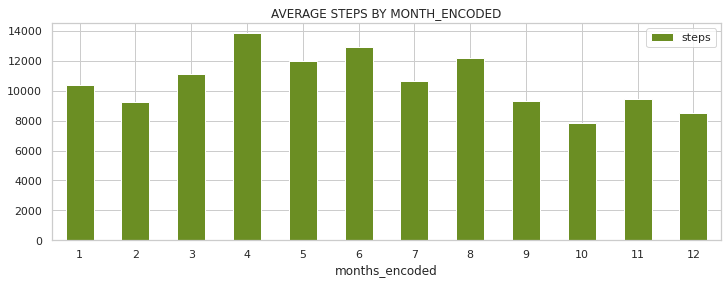

In [74]:
moths_encoded_fig = ave_stp_m_e.plot(kind="bar", title="AVERAGE STEPS BY MONTH_ENCODED", color = "olivedrab")
plt.xticks(rotation=0);

In [ ]:
# De abril a agosto donde se dan más pasos. Quizás esto es motivado por el buen tiempo, pero la razón puede ser otra perfectamente. 

In [75]:
moths_encoded_fig.figure.savefig("../data/figures/moths_encoded_fig.jpg", dpi=1000)

In [77]:
# AVERAGE STEPS BY WORK_OR_WEEKEND

ave_stp_w_w = fitbit.groupby("work_or_weekend").agg({"steps": "mean"})

In [78]:
ave_stp_w_w

,steps
work_or_weekend,
0,10064.238095
1,10144.572519


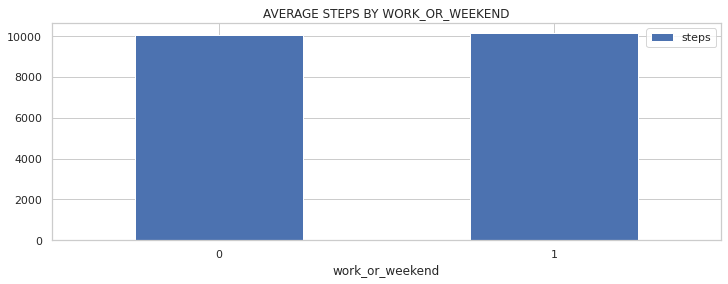

In [80]:
work_weekend_fig = ave_stp_w_w.plot(kind="bar", title="AVERAGE STEPS BY WORK_OR_WEEKEND")
plt.xticks(rotation=0);

In [ ]:
"""
Apenas hay diferencia entre días de trabajo y fin de semana
"""

In [81]:
work_weekend_fig.figure.savefig("../data/figures/work_weekend_fig.jpg", dpi=1000)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

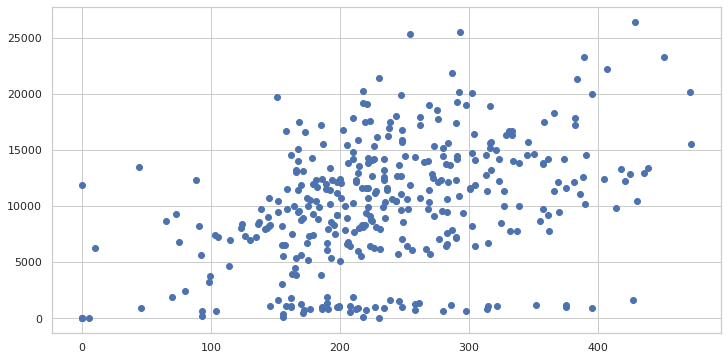

In [182]:
plt.scatter(x=fitbit.minutes_lightly_active, y=fitbit.steps);

In [ ]:
"""
Parece que hay una correlación positiva pero yo creo que no es muy fuerte y el crecimiento varía.
Hay una serie de personas que durante estos minutos de luz activa, permanecen quietos.
"""

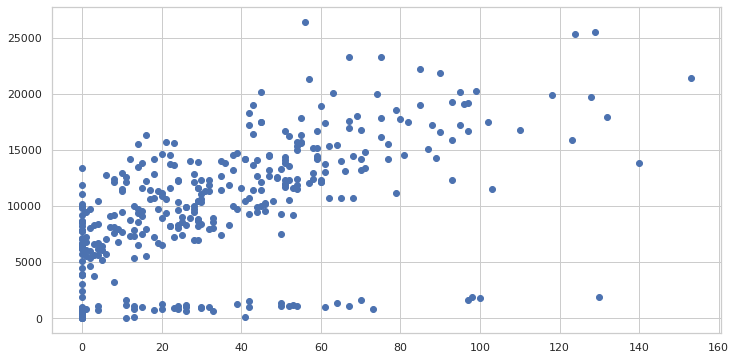

In [184]:
plt.scatter(x=fitbit.minutes_very_active, y=fitbit.steps);

In [ ]:
"""
Aquí yo veo una correlación positiva más fuerte y los puntos se unen de manera más definida.
Hay personas que durante estos minutos de alta actividad, permanecen quietos pero son muchos menos que en la
anterior gráfica.
"""

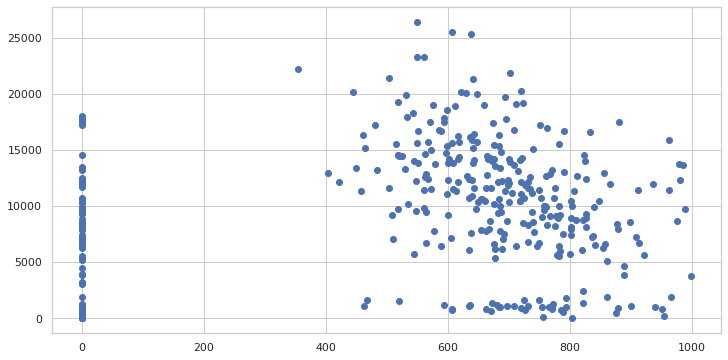

In [185]:
plt.scatter(x=fitbit.minutes_sedentary, y=fitbit.steps);

In [ ]:
"""
Parece que hay una correlación negativa pero, al igual que en la primera gráfica creo que a correlación no es muy fuerte.
La línea vertical en "0" representa a las personas activas.
"""

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [82]:
titanic = pd.read_csv("../data/titanic.csv")

In [83]:
titanic.sample()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1196,1197,NaN,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.55,B26,S


#### Explore the titanic dataset using Pandas dtypes.

In [85]:
titanic.shape

(1309, 12)

In [84]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [86]:
titanic.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [87]:
titanic.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [ ]:
# Hay 418 NaN en la columna "Survived". Por lo demás no habría problemas.

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [90]:
# NUMERICAL VARIABLES
#Estas variables son floats y números enteros.
numericas = titanic._get_numeric_data()
numericas.sample()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
947,948,NaN,3,35.0,0,0,7.8958


In [97]:
#Estos datos serían floats.
titanic.select_dtypes( include="float").head()

,Survived,Age,Fare
0,0.0,22.0,7.2500
1,1.0,38.0,71.2833
2,1.0,26.0,7.9250
3,1.0,35.0,53.1000
4,0.0,35.0,8.0500


In [98]:
# Estos datos son enteros.
titanic.select_dtypes( include="int").head()

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0


In [92]:
# CATEGORICAL VARIABLES
categoricas = titanic.select_dtypes(include="object").head()
categoricas.sample()

,Name,Gender,Ticket,Cabin,Embarked
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [100]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [162]:
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

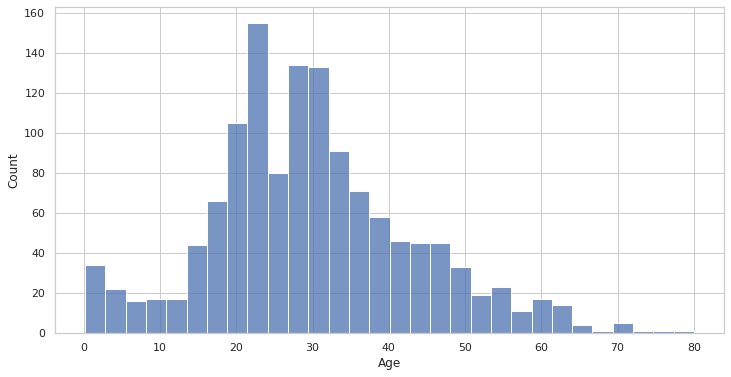

In [101]:
sns.histplot(x=titanic.Age)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:xlabel='Age', ylabel='Count'>

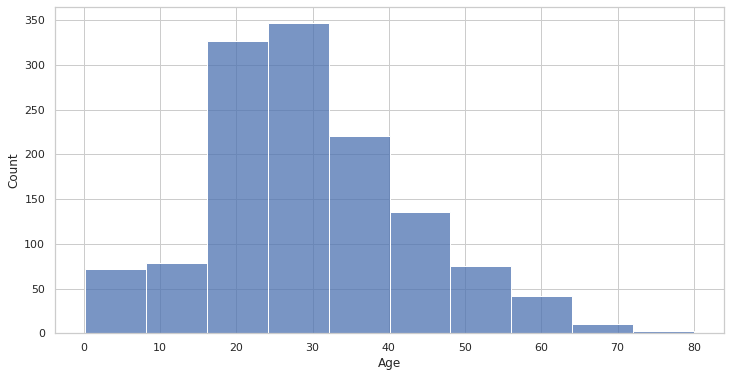

In [102]:
sns.histplot(x=titanic.Age, bins=10)

<AxesSubplot:xlabel='Age', ylabel='Count'>

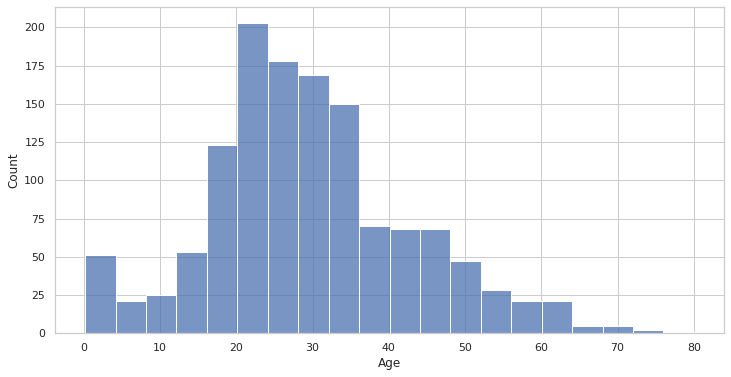

In [103]:
sns.histplot(x=titanic.Age, bins=20)

<AxesSubplot:xlabel='Age', ylabel='Count'>

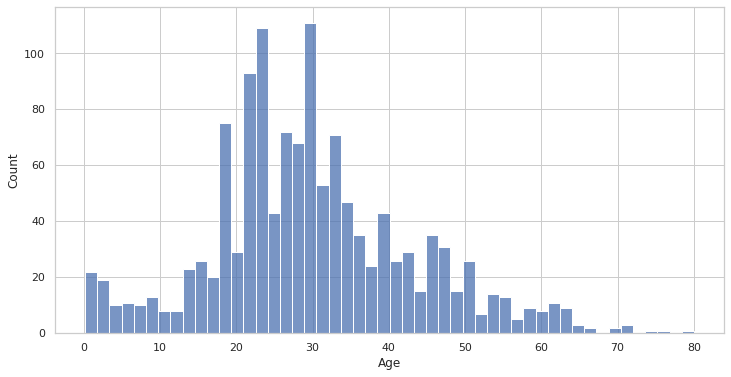

In [104]:
sns.histplot(x=titanic.Age, bins=50)

#### How does the bin size affect your plot?

In [ ]:
"""
Cuanto mayor es el bin, mayor información tenemos de la gráfica. 
Además, aparecen outliers. Éstos, no están cuando los bins son más pequeños.
"""

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

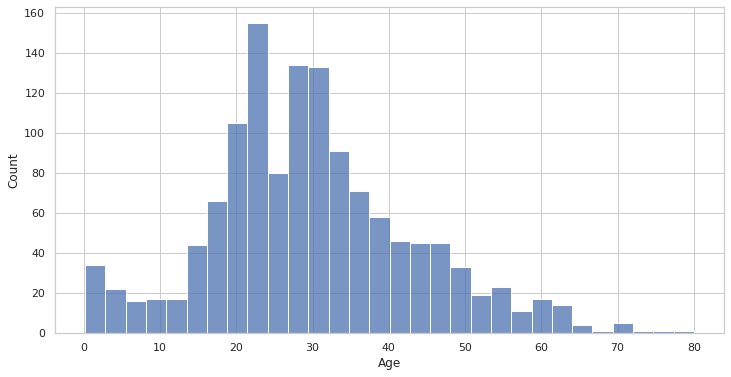

In [122]:
# Entiendo que esto es lo que he hecho arriba.
sns.histplot(x=titanic.Age)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

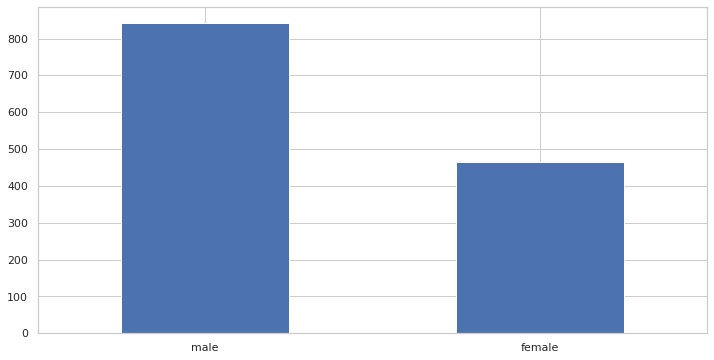

In [163]:
# Method 1 - matplotlib
# your code here
titanic["Gender"].value_counts().plot(kind="bar")
plt.xticks(rotation=0);

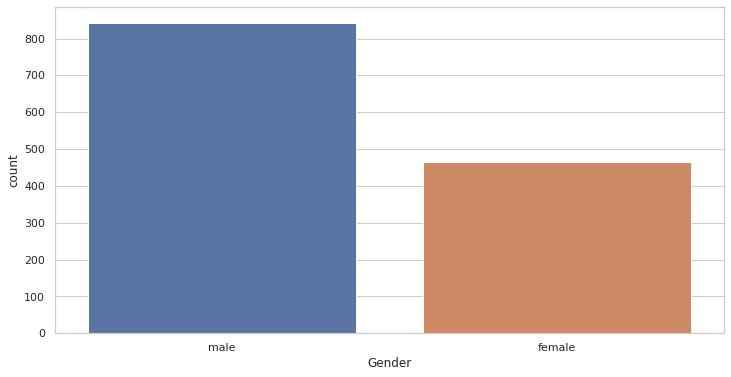

In [164]:
# Method 2 - seaborn
sns.countplot(data=titanic, x="Gender");

In [ ]:
"""
Hay más de un 40% de hombres que de mujeres; con los datos que tenemos aquí sería muy arriesgado decir algo más
simplemente por esta gráfica.
"""

#### Use the right plot to visualize the column `Pclass`.

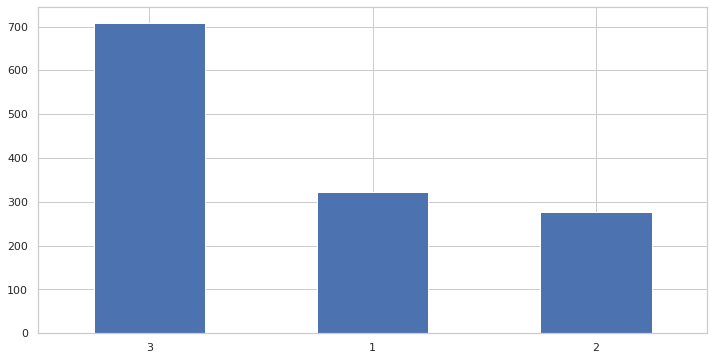

In [165]:
titanic["Pclass"].value_counts().plot(kind="bar")
plt.xticks(rotation=0);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

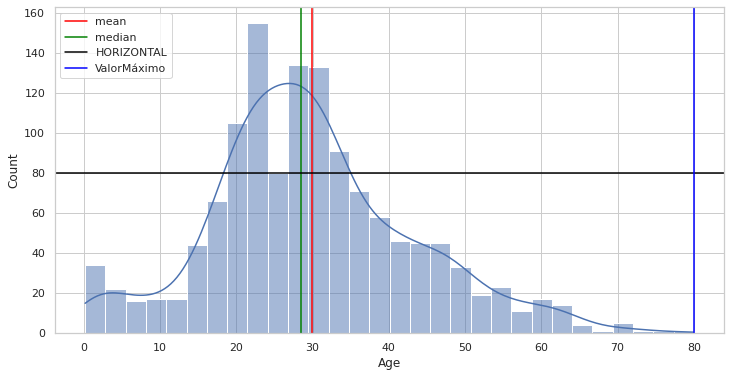

In [169]:
graf = sns.histplot(x=titanic.Age,kde=True)
graf.axvline(x=titanic.Age.mean(), c="red", label="mean")
graf.axvline(x=titanic.Age.median(), c="green", label="median")
graf.axhline(y=80, c="black", label="HORIZONTAL") #Sobre la horizontal marcamos eje y
graf.axvline(x=titanic.Age.max(), c="blue", label="ValorMáximo") #Sobre la vertical marcamos eje x
plt.legend();

In [ ]:
"""
He sacado los valores máximo, media, mediana y valor atípico. Las conclusiones las dejado la respuesta de abajo. 
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Existe una pequeña diferencia entre la mediana (por debajo de los 30 años) y la media provocado por el outlier de 80 años; 
la mediana es muy poco sensible a valores atípicos en comparación con la media. 
El valor máximo se encuentra entre los 25 y treinta años.
Además, el hecho de que haya niños indica que van familias en el barco (bastantes de estos niños son recien nacidos).
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# No entiendo esta pregunta; creo que ya está hecho arriba.

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Con lo comentado, mi respuesta sería lo que he escrito anteriormente.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

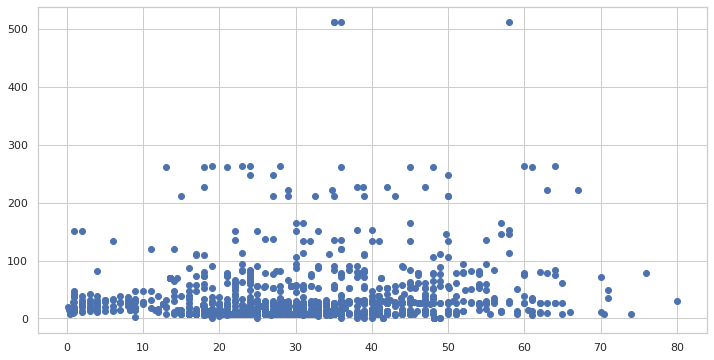

In [180]:
# Method 1 - matplotlib
plt.scatter(x=titanic.Age, y=titanic.Fare);

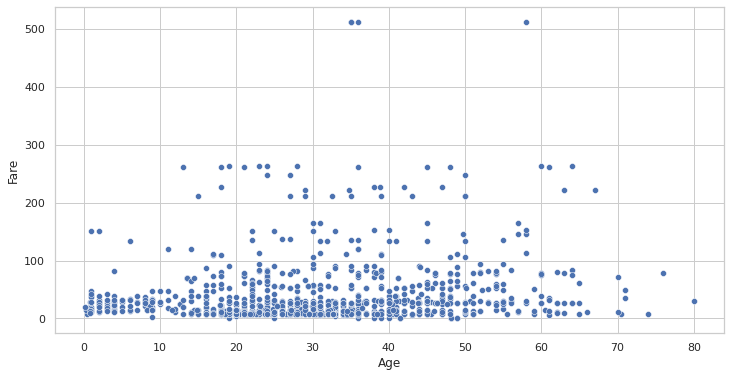

In [181]:
# Method 2 - seaborn
sns.scatterplot(x="Age", y="Fare",data=titanic);

In [ ]:
"""
No veo ninguna relación entre las dos variables. Además, si venos la matriz de correlación de más adelante, el factor 
es bastante bajo.
"""

#### Plot the correlation matrix using seaborn.

In [171]:

corr = titanic.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


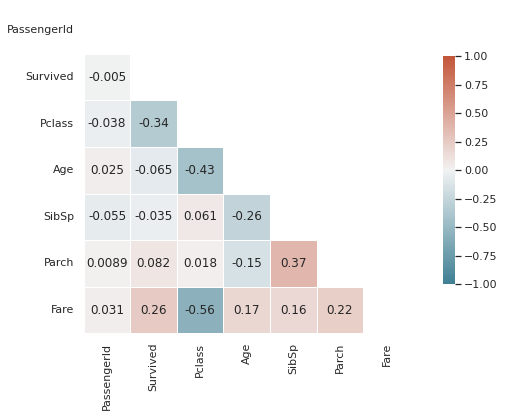

In [173]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .7
                     },# barra lateral
            annot=True
);

#### What are the most correlated features?

In [ ]:
"""
Existe una correlación fuerte entre "Clase" y "Pasaje"; esto es lógico aunque en principio yo le hubiese puesto
mayor grado. 
También es fuerte la relación entre clase y edad; esto lo comento en la siguiente gráfica.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

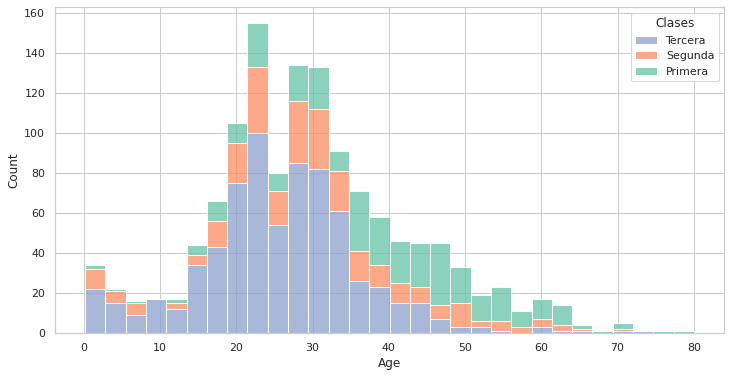

In [146]:

sns.histplot(data=titanic, x= "Age", hue="Pclass",  multiple="stack", palette="Set2")
plt.legend(title='Clases', labels=['Tercera', 'Segunda', 'Primera']);

In [ ]:
"""
Para mí visuamente es más sencillo ir superponiendo. El azul son tercera clase, el color rosado; segunda clase
y el color verde los de primera clase. 
La suma de los tres son el número de pasajeros por edades.

Hasta la edad de 35 años, la mayoría son de 3ª clase. A partir de ahí se invierte la curva y, porcentualmente, la mayoría de 
las personas con más de 35 años son de primera clase. 

La varianción en cuanto a número de personas en la primera clase (longitud recuadro verde)no es muy dramática. Sin embargo,
porcentualmente incrementa en el punto de los 35 años por la fuerte bajada en los pasajeros de 3ª clase.
"""

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

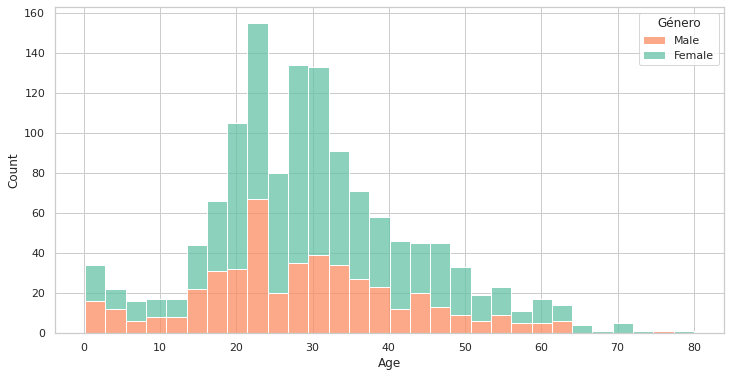

In [145]:

sns.histplot(data=titanic, x= "Age", hue="Gender",  multiple="stack", palette="Set2")
plt.legend(title='Género', labels=['Male', 'Female']);

In [ ]:
"""
Aunque efectivamente hay menos mujeres que hombres, la línea de la gráfica (línea externa) es muy similar.
Esto quiere decir que la evolución de ambos géneros a lo largo de las diferentes edades es similar. En los extremos las 
diferencias entre ambos sexos son pequeñas. 
Faltan datos para saber porqué hay más hombres que mujeres, pero quizás uno de los factores pueda ser la tripulación. Aun así,
no está claro el motivo.
"""